In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp
from mpmath import *
mp.pretty = True

We introduce the definitions of special function solutions.

In [105]:
def f(a,b,x,d1,d2):
  return d1*sp.gamma(a)*sp.gamma(b-a)/sp.gamma(b)*sp.hyp1f1(a,b,x)+d2*x**(1-b)/sp.gamma(2-b)/np.sin(np.pi*(b-a))*sp.hyp1f1(a-b+1,2-b,x)


In [ ]:
def M(n, x, alpha,beta,i_shift,j_shift, d1, d2,N,K):
  i_values = np.arange(n)[:, None,None,None]
  j_values = np.arange(n)[None, :,None,None]
  alpha_values = alpha+i_shift+ i_values
  beta_values = beta+j_shift + j_values
  x=x[None, None, :, :]
  M = f(alpha_values,beta_values, x, d1, d2)
  M=np.transpose(M,(2,3,0,1))
  return M
def tau(n, x, alpha,beta,i_shift,j_shift,d1,d2,N,K):
  return np.linalg.det(M(n,x,alpha,beta,i_shift,j_shift,d1,d2,N,K))
def u(n, x, alpha,beta,d1,d2,N,K):
  return tau(n+1, x, alpha,beta,0,1,d1,d2,N,K)*tau(n, x, alpha,beta,1,0,d1,d2,N,K)/tau(n+1, x, alpha,beta,1,1,d1,d2,N,K)/tau(n, x, alpha,beta,0,0,d1,d2,N,K)

Let's check that we are getting correct functions

In [ ]:
x = np.linspace(1, 2, 2) # Real domain.
y = np.linspace(1, 2, 2) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

In [ ]:
Z

array([[1.+1.j, 2.+1.j],
       [1.+2.j, 2.+2.j]])

In [ ]:
M(3,Z,11/27,25/27,0,0,55/100,77/100,2,2)

array([[[[ 3.59537132e+00 +2.39922804j,  1.76087146e+00 +0.57157198j,
           1.28655100e+00 +0.33108159j],
         [-3.05645132e+00 -9.63613215j,  1.83449986e+00 +1.82765605j,
           4.74320459e-01 +0.24049039j],
         [-1.53303624e+00+20.19377462j, -4.89095117e+00-11.4637882j ,
           1.36017940e+00 +1.58716566j]],

        [[ 6.34421621e+00 +5.31172774j,  2.38642385e+00 +0.94566354j,
           1.57872414e+00 +0.410206j  ],
         [-1.27402640e+01-30.8505281j ,  3.95779236e+00 +4.3660642j ,
           8.07699711e-01 +0.53545755j],
         [ 1.08744271e+01+88.12158936j, -1.66980564e+01-35.2165923j ,
           3.15009265e+00 +3.83060665j]]],


       [[[ 1.34691766e+00 +3.31419723j,  1.41638187e+00 +0.92432744j,
           1.19394891e+00 +0.50657949j],
         [ 8.93172371e+00 -7.47935278j, -6.94642165e-02 +2.38986979j,
           2.22432968e-01 +0.41774796j],
         [-2.78843898e+01 +1.61550668j,  9.00118792e+00 -9.86922257j,
          -2.91897184e-01 +1.9721218

In [ ]:
np.shape(M(3,Z,11/27,25/27,0,0,55/100,77/100,2,2))

(2, 2, 3, 3)

In [ ]:
np.linalg.det(M(2,Z,11/27,25/27,0,0,55/100,77/100,2,2))

array([[   2.08501926 +29.6874577j ,    3.14719637+134.39241007j],
       [ -27.57816501  +5.32652205j, -121.15187544  +8.09142925j]])

In [ ]:
u(2,Z,11/27,25/27,55/100,77/100,2,2)

array([[0.28789202+0.19556871j, 0.30406755+0.06523243j],
       [0.36731763+0.19015119j, 0.4087544 +0.08253723j]])

We produce the grid on the complex plane.

In [ ]:
x = np.linspace(-20, 20, 400) # Real domain.
y = np.linspace(-20, 20, 400) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

We introduce the function to evaluate the complex phases of the function on the grid in the complex plane.

In [ ]:
def U(n,x,alpha,beta,d1,d2,N,K):
  return np.angle(u(n, x, alpha,beta,d1,d2,N,K))

Illustration of colors

CPU times: user 5.42 s, sys: 153 ms, total: 5.58 s
Wall time: 5.82 s


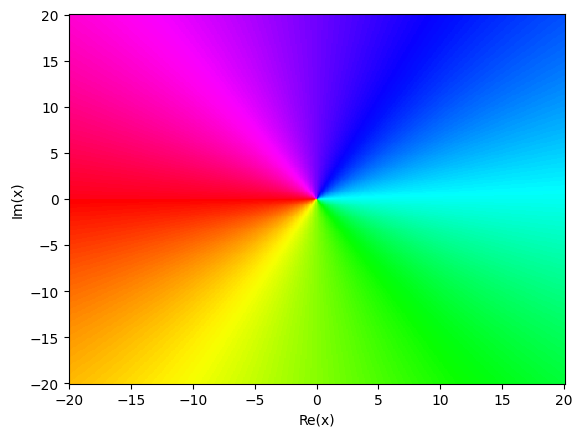

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,np.angle(Z),vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.savefig("color_wheel.eps", format="eps")

Small alpha large n.

CPU times: user 5min, sys: 880 ms, total: 5min 1s
Wall time: 5min 3s


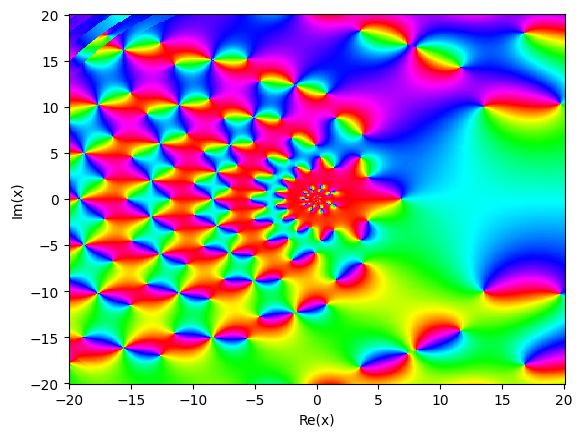

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,Z,11/27,25/27,55/100,71/100,400,400).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.savefig("small_alpha_large_n.png", format="png")

In [ ]:
x = np.linspace(-40, 40, 800) # Real domain.
y = np.linspace(-40, 40, 800) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

/tmp/ipython-input-1656970599.py:13: RuntimeWarning: overflow encountered in multiply
  return tau(n+1, x, alpha,beta,0,1,d1,d2,N,K)*tau(n, x, alpha,beta,1,0,d1,d2,N,K)/tau(n+1, x, alpha,beta,1,1,d1,d2,N,K)/tau(n, x, alpha,beta,0,0,d1,d2,N,K)
/tmp/ipython-input-1656970599.py:13: RuntimeWarning: overflow encountered in divide
  return tau(n+1, x, alpha,beta,0,1,d1,d2,N,K)*tau(n, x, alpha,beta,1,0,d1,d2,N,K)/tau(n+1, x, alpha,beta,1,1,d1,d2,N,K)/tau(n, x, alpha,beta,0,0,d1,d2,N,K)
/tmp/ipython-input-1656970599.py:13: RuntimeWarning: invalid value encountered in divide
  return tau(n+1, x, alpha,beta,0,1,d1,d2,N,K)*tau(n, x, alpha,beta,1,0,d1,d2,N,K)/tau(n+1, x, alpha,beta,1,1,d1,d2,N,K)/tau(n, x, alpha,beta,0,0,d1,d2,N,K)


CPU times: user 23min 9s, sys: 3.97 s, total: 23min 13s
Wall time: 23min 25s


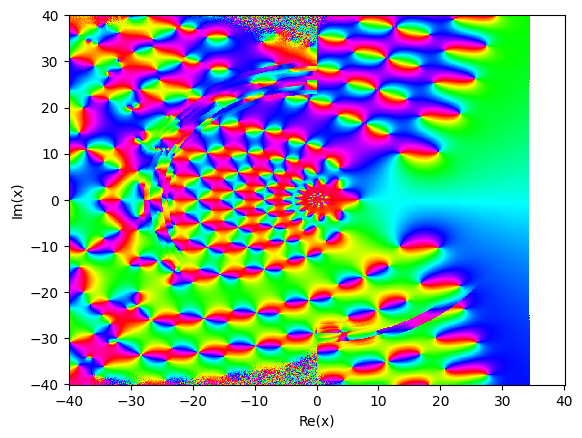

In [ ]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,Z,11/27,25/27,55/100,71/100,400,400).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.savefig("small_alpha_large_n.png", format="png")

In [55]:
x = np.linspace(-60, 30, 200) # Real domain.
y = np.linspace(-40, 40, 200) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

CPU times: user 24.7 s, sys: 35.9 ms, total: 24.7 s
Wall time: 24.8 s


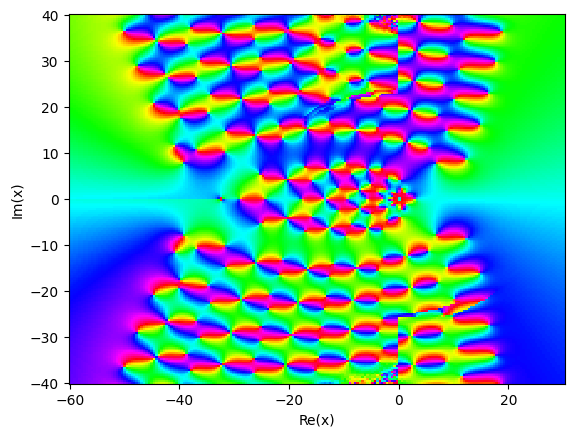

In [56]:
%%time
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(5,Z,11/27,25/27,55/100,71/100,200,200).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.savefig("small_alpha_large_n.png", format="png")

In [57]:
x = np.linspace(-150, 20, 200) # Real domain.
y = np.linspace(-50, 50, 200) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

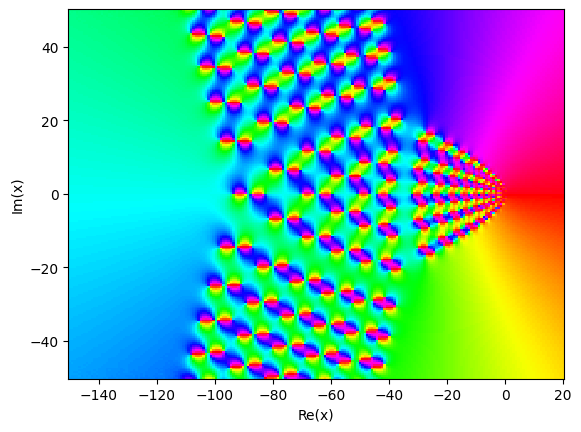

In [58]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(5,Z,11,25/27,55/100,71/100,200,200).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.savefig("small_alpha_large_n.png", format="png")

special case $d2=0$

In [59]:
def f(a,b,x,d1,d2):
  return sp.hyp1f1(a,b,x)


In [60]:
def M(n, x, alpha,beta,i_shift,j_shift, d1, d2,N,K):
  i_values = np.arange(n)[:, None,None,None]
  j_values = np.arange(n)[None, :,None,None]
  alpha_values = alpha+i_shift+ i_values
  beta_values = beta+j_shift + j_values
  x=x[None, None, :, :]
  M = f(alpha_values,beta_values, x, d1, d2)
  M=np.transpose(M,(2,3,0,1))
  return M
def tau(n, x, alpha,beta,i_shift,j_shift,d1,d2,N,K):
  return np.linalg.det(M(n,x,alpha,beta,i_shift,j_shift,d1,d2,N,K))
def u(n, x, alpha,beta,d1,d2,N,K):
  return tau(n+1, x, alpha,beta,0,1,d1,d2,N,K)*tau(n, x, alpha,beta,1,0,d1,d2,N,K)/tau(n+1, x, alpha,beta,1,1,d1,d2,N,K)/tau(n, x, alpha,beta,0,0,d1,d2,N,K)

In [66]:
x = np.linspace(-10, 40,200) # Real domain.
y = np.linspace(-20, 20, 200) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

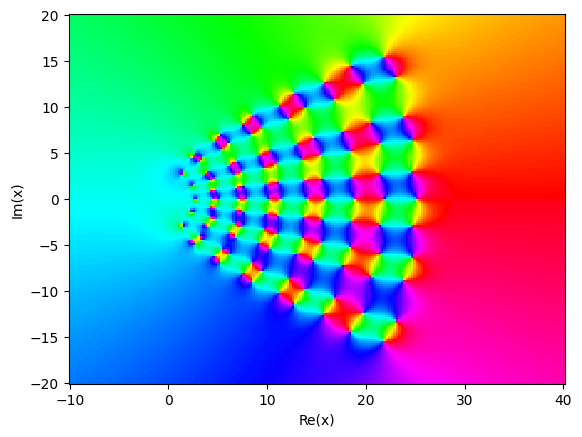

In [67]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(5,Z,-11,25/27,55/100,0,200,200).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.savefig("small_alpha_large_n.png", format="png")

In [70]:
x = np.linspace(-40, 40,200) # Real domain.
y = np.linspace(-40, 40, 200) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y

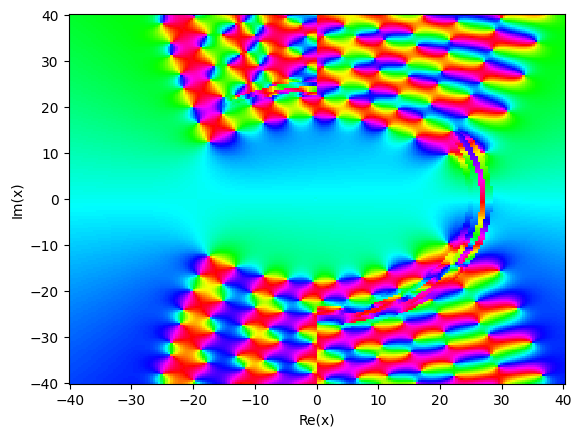

In [71]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(5,Z,11/27,5/2,55/100,0,200,200).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.savefig("small_alpha_large_n.png", format="png")

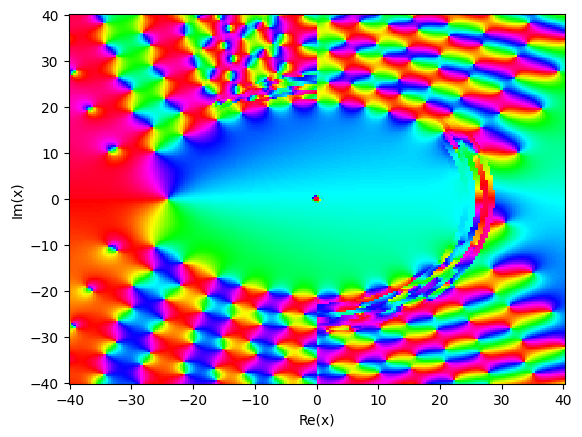

In [74]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(7,Z,11/27,22/27,55/100,0,200,200).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.savefig("small_alpha_large_n.png", format="png")

Real domain

In [19]:
def f(a,b,x,d1,d2):
  return d1*sp.gamma(a)*sp.gamma(b-a)/sp.gamma(b)*sp.hyp1f1(a,b,x)+d2*x**(1-b)/sp.gamma(2-b)/np.sin(np.pi*(b-a))*sp.hyp1f1(a-b+1,2-b,x)

In [20]:
def M(n, x, alpha,beta,i_shift,j_shift, d1, d2,N):
  i_values = np.arange(n)[:, None,None]
  j_values = np.arange(n)[None, :,None]
  alpha_values = alpha+i_shift+ i_values
  beta_values = beta+j_shift + j_values
  x=x[None, None, :]
  M = f(alpha_values,beta_values, x, d1, d2)
  M=np.transpose(M,(2,1,0))
  return M
def tau(n, x, alpha,beta,i_shift,j_shift,d1,d2,N):
  return np.linalg.det(M(n,x,alpha,beta,i_shift,j_shift,d1,d2,N))
def u(n, x, alpha,beta,d1,d2,N):
  return tau(n+1, x, alpha,beta,0,1,d1,d2,N)*tau(n, x, alpha,beta,1,0,d1,d2,N)/tau(n+1, x, alpha,beta,1,1,d1,d2,N)/tau(n, x, alpha,beta,0,0,d1,d2,N)

In [22]:
x = np.linspace(1, 10, 2) # Real domain.

In [102]:
x

array([ 1., 10.])

In [26]:
np.shape(M(3,x,11/27,25/27,0,0,55/100,77/100,2))

(2, 3, 3)

In [27]:
M(3,x,11/27,25/27,0,0,55/100,77/100,2)

array([[[ 4.56786016e+00, -9.46545608e+00,  1.72014778e+01],
        [ 1.87139841e+00,  2.69646175e+00, -1.21619178e+01],
        [ 1.23565463e+00,  6.35743780e-01,  2.06071797e+00]],

       [[ 9.40272691e+03, -1.92304217e+05,  1.54065559e+06],
        [ 5.26709033e+02,  8.87601788e+03, -2.01180235e+05],
        [ 8.79295856e+01,  4.38779448e+02,  8.43723843e+03]]])

In [28]:
x = np.linspace(1, 10, 100) # Real domain.

CPU times: user 56.7 ms, sys: 0 ns, total: 56.7 ms
Wall time: 59.6 ms


Text(0, 0.5, 'u')

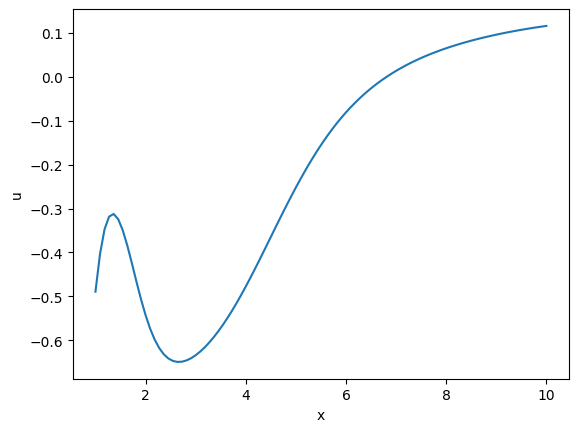

In [29]:
%%time
plt.plot(x, u(10,x,11/27,25/27,55/100,71/100,100),label="solution")
plt.xlabel('x')
plt.ylabel('u')